# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['torbay', 'rikitea', 'bluff', 'jamestown', 'tasiilaq', 'krasnoselkup', 'barstow', 'bredasdorp', 'barrow', 'busselton', 'sinnamary', 'puerto ayora', 'matara', 'barentsburg', 'guerrero', 'meulaboh', 'atuona', 'bethel', 'tilichiki', 'illoqqortoormiut', 'abu dhabi', 'amderma', 'taurage', 'cape town', 'mataura', 'punta arenas', 'butaritari', 'willmar', 'ushuaia', 'atambua', 'saskylakh', 'scarborough', 'port elizabeth', 'ribeira grande', 'tuatapere', 'illora', 'vaini', 'hatfield', 'hamilton', 'mataram', 'constitucion', 'kruisfontein', 'porto novo', 'volchikha', 'castro', 'ilulissat', 'albany', 'mar del plata', 'chuy', 'tsihombe', 'port alfred', 'coruripe', 'hobart', 'provideniya', 'clyde river', 'khani', 'new norfolk', 'magistralnyy', 'tautira', 'yagodnoye', 'khatanga', 'taolanaro', 'pimentel', 'hermanus', 'viligili', 'mutsamudu', 'kuching', 'san quintin', 'egvekinot', 'anadyr', 'hithadhoo', 'faanui', 'bilma', 'sao filipe', 'katsuura', 'ambilobe', 'victoria', 'margate', 'padang', 'juneau', 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
#create lists for each of the keys in the API
# Request cities querying URL
url_starter = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
api_key= "eda28f16052110af458c62ba493a7fc6"

 # Build partial query URL
query_url = f"{url_starter}units={units}&APPID={api_key}"

city_names= []
max_temp=[]
wind_speed=[]
humidity=[]
clouds=[]
country=[]
lat=[]
lng=[]
date=[]

record = 1

print(f"Beginning Data Retrieval")
print(f"----------------------=--------")

# Loop through the cities in the city list 
for city in cities:  
    
# # Try statement to append calls where value is found 
# #Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by citiPy module
    try: 
#         Starting URL for Weather Map API Call
        response = requests.get(f"{query_url}&q={city}").json()
        city_names.append(response["name"])
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        max_temp.append(response["main"]["temp_max"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")

    continue


Beginning Data Retrieval
----------------------=--------
Processing Record 1 | Torbay
City not found. Skipping...
Processing Record 1 | Rikitea
City not found. Skipping...
Processing Record 1 | Bluff
City not found. Skipping...
Processing Record 1 | Jamestown
City not found. Skipping...
Processing Record 1 | Tasiilaq
City not found. Skipping...
City not found. Skipping...
Processing Record 1 | Barstow
City not found. Skipping...
Processing Record 1 | Bredasdorp
City not found. Skipping...
Processing Record 1 | Barrow
City not found. Skipping...
Processing Record 1 | Busselton
City not found. Skipping...
Processing Record 1 | Sinnamary
City not found. Skipping...
Processing Record 1 | Puerto Ayora
City not found. Skipping...
Processing Record 1 | Matara
City not found. Skipping...
City not found. Skipping...
Processing Record 1 | Guerrero
City not found. Skipping...
Processing Record 1 | Meulaboh
City not found. Skipping...
Processing Record 1 | Atuona
City not found. Skipping...
Proces

Processing Record 1 | Tiksi
City not found. Skipping...
Processing Record 1 | Baft
City not found. Skipping...
Processing Record 1 | Ngunguru
City not found. Skipping...
Processing Record 1 | Kapaa
City not found. Skipping...
City not found. Skipping...
Processing Record 1 | Rawson
City not found. Skipping...
Processing Record 1 | Avarua
City not found. Skipping...
Processing Record 1 | Georgetown
City not found. Skipping...
Processing Record 1 | Thetford Mines
City not found. Skipping...
Processing Record 1 | Ilhabela
City not found. Skipping...
Processing Record 1 | Kulhudhuffushi
City not found. Skipping...
Processing Record 1 | Shimoda
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 1 | Montepuez
City not found. Skipping...
Processing Record 1 | Pangnirtung
City not found. Skipping...
Processing Record 1 | Port Keats
City not found. Skipping...
Processing Record 1 | Troitsko-Pechorsk
City not found. Skipping...
Processing Record

Processing Record 1 | Kavaratti
City not found. Skipping...
City not found. Skipping...
Processing Record 1 | Solnechnyy
City not found. Skipping...
Processing Record 1 | Half Moon Bay
City not found. Skipping...
Processing Record 1 | Kalmunai
City not found. Skipping...
City not found. Skipping...
Processing Record 1 | Gornyy
City not found. Skipping...
Processing Record 1 | Pushkino
City not found. Skipping...
Processing Record 1 | Kupang
City not found. Skipping...
Processing Record 1 | Sabzevar
City not found. Skipping...
Processing Record 1 | Vao
City not found. Skipping...
Processing Record 1 | Lai
City not found. Skipping...
Processing Record 1 | Birao
City not found. Skipping...
Processing Record 1 | Soyo
City not found. Skipping...
Processing Record 1 | Mayo
City not found. Skipping...
Processing Record 1 | Manono
City not found. Skipping...
Processing Record 1 | Souillac
City not found. Skipping...
Processing Record 1 | Coahuayana
City not found. Skipping...
Processing Record

Processing Record 1 | Bilibino
City not found. Skipping...
City not found. Skipping...
Processing Record 1 | Kaa-Khem
City not found. Skipping...
Processing Record 1 | Nanuque
City not found. Skipping...
Processing Record 1 | Kosonsoy
City not found. Skipping...
Processing Record 1 | Cananea
City not found. Skipping...
Processing Record 1 | Port Hedland
City not found. Skipping...
Processing Record 1 | Madras
City not found. Skipping...
Processing Record 1 | Champerico
City not found. Skipping...
Processing Record 1 | Uruzgan
City not found. Skipping...
Processing Record 1 | Byron Bay
City not found. Skipping...
Processing Record 1 | Basco
City not found. Skipping...
Processing Record 1 | Panormos
City not found. Skipping...
Processing Record 1 | Bilecik
City not found. Skipping...
Processing Record 1 | Dunedin
City not found. Skipping...
Processing Record 1 | Ostrovnoy
City not found. Skipping...
Processing Record 1 | Kaitangata
City not found. Skipping...
Processing Record 1 | Shagha

Processing Record 1 | Longford
City not found. Skipping...
City not found. Skipping...
Processing Record 1 | Morehead
City not found. Skipping...
Processing Record 1 | Damaturu
City not found. Skipping...
Processing Record 1 | Sorong
City not found. Skipping...
Processing Record 1 | Kiyasovo
City not found. Skipping...
Processing Record 1 | Ola
City not found. Skipping...
Processing Record 1 | Minab
City not found. Skipping...
Processing Record 1 | Oistins
City not found. Skipping...
City not found. Skipping...
Processing Record 1 | Trofors
City not found. Skipping...
Processing Record 1 | Gladstone
City not found. Skipping...
Processing Record 1 | Tsaratanana
City not found. Skipping...
Processing Record 1 | Karratha
City not found. Skipping...
Processing Record 1 | Belaya Gora
City not found. Skipping...


In [12]:
len(wind_speed)

542

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
# create dictionary with all the lists that you have and then create a dataframe with the dictionary

weather_dict = {
    "City": city_names,
    "Cloudiness": clouds,
    "Country": country,
    "Date": date,
    "Humidity":humidity,
    "Lat": lat,
    "Lng": lng, 
    "Max Temp": max_temp, 
    "Wind Speed":wind_speed
 } 


weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv("Weatherdata_APIHMWK.csv")
weather_df.head()






,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Torbay,40,CA,1553361519,71,47.66,-52.73,54.00,16.11
1,Rikitea,32,PF,1553361821,98,-23.12,-134.97,79.33,18.95
2,Bluff,0,AU,1553361486,89,-23.58,149.07,70.24,3.74
3,Jamestown,92,AU,1553361726,93,-33.21,138.60,63.22,7.76
4,Tasiilaq,20,GL,1553359800,56,65.61,-37.64,15.80,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

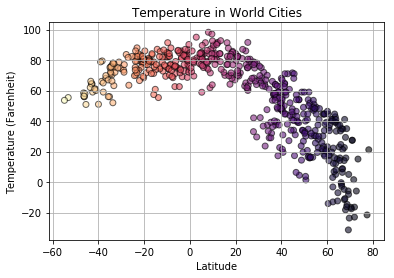

In [27]:
# # Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", c = weather_df["Lat"], alpha=0.6, cmap='magma_r', edgecolors='black')

# # Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("TemperatureInWorldCities.png")

# # Show plot
plt.show()

#### Latitude vs. Humidity Plot

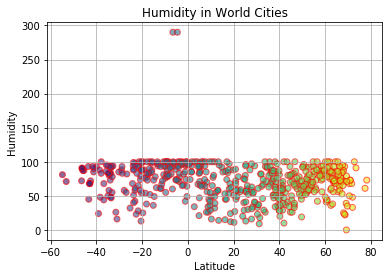

In [30]:
# # Build a scatter plot for each data type

plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", c = weather_df["Lat"], alpha=0.6, cmap='viridis', edgecolors='red')

# # Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("HumidityInWorldCities.png")

# # Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

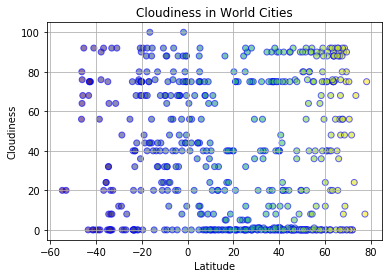

In [33]:
# # Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", c = weather_df["Lat"], alpha=0.6, cmap='viridis', edgecolors='blue')

# # Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("CloudinessInWorldCities.png")

# # Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

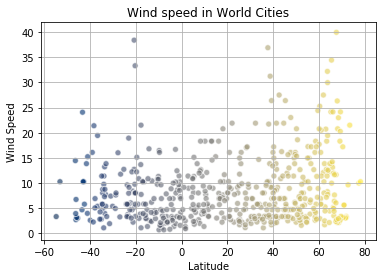

In [31]:
# # Build a scatter plot for each data type

plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", c = weather_df["Lat"], alpha=0.6, cmap='cividis', edgecolors='white')

# # Incorporate the other graph properties
plt.title("Wind speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("WindspeedInWorldCities.png")

# # Show plot
plt.show()